# MSCA 31013 BIG DATA PLATFORMS FINAL PROJECT
### GARIMA SOHI

## MODULE - 4 (GEOGRAPHICAL ANALYSIS)

#### 4.1 Importing required packages and libraries for setting up the environment

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [2]:
from google.cloud import storage

In [3]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True) 

#### 4.2 Reading the file

In [4]:
tweets_geo = spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/gsohi/bdp_final_project_eda')

In [5]:
tweets_geo.count()

8350980

In [6]:
tweets_geo.columns

['user_id',
 'user_name',
 'user_description',
 'user_location',
 'statuses_count',
 'user_verified_status',
 'retweet_user_id',
 'retweet_user_name',
 'retweet_user_description',
 'user_followers_count',
 'place_country',
 'tweet_created_at',
 'is_retweeted',
 'text']

#### 4.3 Top 10 geographical locations by User Location

In [5]:
geo_top10 = tweets_geo.groupby('user_location').agg(sum('statuses_count')).orderBy('sum(statuses_count)',ascending=False).na.drop()

In [6]:
geo_top = geo_top10.toPandas().head(10)

In [11]:
print(geo_top['user_location'].head(5))

0    Farmington Hills, MI
1           United States
2                Novi, MI
3                     USA
4                   India
Name: user_location, dtype: object


#### 4.4 Top 10 countries by tweets volume

In [12]:
country_top = tweets_geo.groupby('place_country').agg(sum('statuses_count')).orderBy('sum(statuses_count)',ascending=False).na.drop()

In [13]:
country_top = country_top.toPandas()

In [14]:
country_top = country_top.rename(columns={'place_country':'country','sum(statuses_count)':'total_tweets'}).set_index('country')

In [15]:
country_top10 = country_top.head(10).sort_values('total_tweets')

In [16]:
country_top10

,total_tweets
country,
United States,1287886041
India,98093550
United Kingdom,91733253
Canada,49040137
Kenya,23803518
Uganda,16278705
Australia,15927858
South Africa,13818584
Nigeria,13383993


In [15]:
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 7.2 MB/s eta 0:00:00


In [16]:
import openpyxl
country_top.to_excel(r'gs://msca-bdp-students-bucket/shared_data/gsohi/export_dataframe.xlsx')

#### 4.5 Understanding insights through visualization

Text(0.5, 1.0, 'Top 10 countries with most tweets')

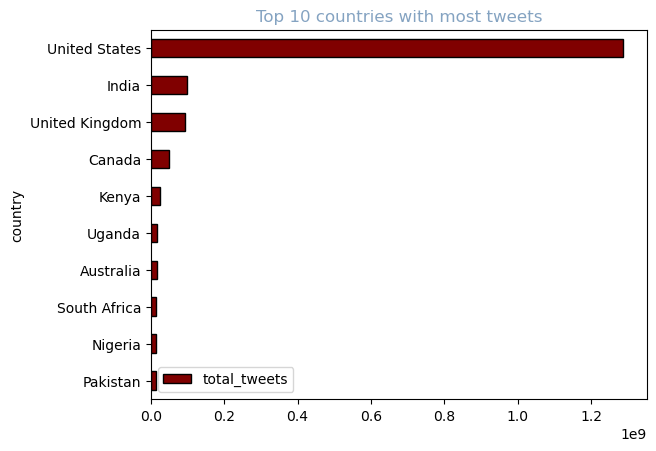

In [21]:
country_top10.plot.barh(color=['maroon'],edgecolor='black')
plt.title('Top 10 countries with most tweets',color=(0.2, 0.4, 0.6, 0.6))
